# Homework 00

Quentin Deschamps, 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv', index_col=0)
df.head()

,Intent,Gender,Age,Race,Deaths,Population,Rate
1,None selected,None selected,None selected,None selected,33599,316299978,10.6
2,None selected,None selected,None selected,White,22079,197369634,11.2
3,None selected,None selected,None selected,Black,7765,38896382,20.0
4,None selected,None selected,None selected,Hispanic,3007,54049078,5.6
5,None selected,None selected,None selected,Asian/Pacific Islander,442,16315561,2.7


## Intent

In [3]:
deaths_by_intent = df[['Intent', 'Deaths']].groupby('Intent').sum()
deaths_by_intent.drop('None selected', inplace=True)
deaths_by_intent['Death percent'] = (deaths_by_intent['Deaths'] / deaths_by_intent['Deaths'].sum()) * 100
deaths_by_intent

,Deaths,Death percent
Intent,,
Accident,4368,1.625067
Homicide,93808,34.900238
Suicide,168464,62.675184
Unknown,2149,0.799512


<AxesSubplot:title={'center':'Number of gun deaths by intent'}, xlabel='Intent'>

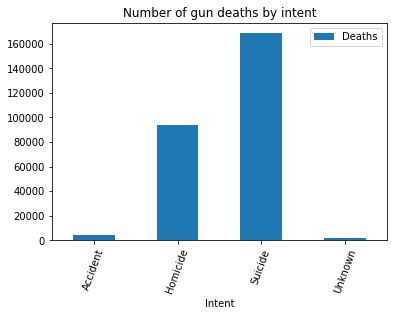

In [4]:
deaths_by_intent.plot.bar(y='Deaths', rot=70, title='Number of gun deaths by intent')

<AxesSubplot:title={'center':'Number of gun deaths by intent'}, ylabel='Deaths'>

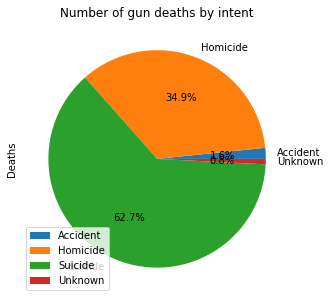

In [5]:
deaths_by_intent.plot.pie(
    y='Deaths', title='Number of gun deaths by intent',
    autopct='%1.1f%%', figsize=(5, 5)
)

- Nearly two-thirds of gun deaths are suicides.
- Around a third of all gun deaths are homicides.

## Gender

In [6]:
deaths_by_gender = df[['Gender', 'Deaths']].groupby('Gender').sum()
deaths_by_gender.drop('None selected', inplace=True)
deaths_by_gender['Death percent'] = (deaths_by_gender['Deaths'] / deaths_by_gender['Deaths'].sum()) * 100
deaths_by_gender

,Deaths,Death percent
Gender,,
Female,38534,14.335832
Male,230261,85.664168


<AxesSubplot:title={'center':'Percent of gun deaths by gender'}, xlabel='Gender'>

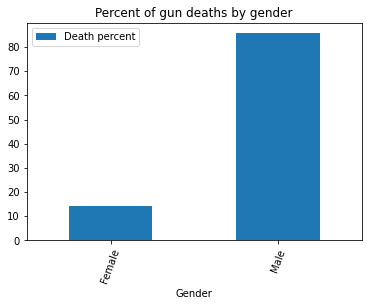

In [7]:
deaths_by_gender.plot.bar(
    y='Death percent', rot=70, title='Percent of gun deaths by gender'
)

More than 85 percent of suicide victims are male.

## Homicides

In [8]:
homicide = df[(df.Intent == 'Homicide')]
homicide.head()

,Intent,Gender,Age,Race,Deaths,Population,Rate
217,Homicide,None selected,None selected,None selected,11726,316299978,3.7
218,Homicide,None selected,None selected,White,3049,197369634,1.5
219,Homicide,None selected,None selected,Black,6503,38896382,16.7
220,Homicide,None selected,None selected,Hispanic,1878,54049078,3.5
221,Homicide,None selected,None selected,Asian/Pacific Islander,186,16315561,1.1


In [9]:
group = homicide[(homicide.Gender == 'Male') & (homicide.Age == '15 - 34')]
group

,Intent,Gender,Age,Race,Deaths,Population,Rate
301,Homicide,Male,15 - 34,None selected,6520,44017869,14.8
302,Homicide,Male,15 - 34,White,913,24831032,3.7
303,Homicide,Male,15 - 34,Black,4312,5869943,73.5
304,Homicide,Male,15 - 34,Hispanic,1166,9379683,12.4
305,Homicide,Male,15 - 34,Asian/Pacific Islander,76,2415040,3.1
306,Homicide,Male,15 - 34,Other,54,1522171,3.5


In [10]:
deaths_by_race = group[['Race', 'Deaths']].groupby('Race').sum()
deaths_by_race.drop('None selected', inplace=True)
deaths_by_race

,Deaths
Race,
Asian/Pacific Islander,76
Black,4312
Hispanic,1166
Other,54
White,913


<AxesSubplot:title={'center':'Number of gun homicide victims who are males in the age-group of 15-34 by race'}, xlabel='Race'>

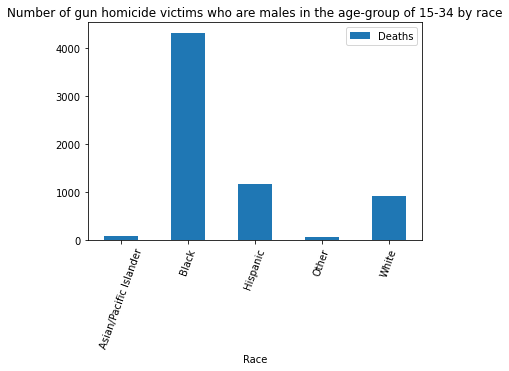

In [11]:
deaths_by_race.plot.bar(
    y='Deaths', rot=70,
    title='Number of gun homicide victims who are males in the age-group of 15-34 by race'
)

<AxesSubplot:title={'center':'Number of gun homicide victims who are males in the age-group of 15-34 by race'}, ylabel='Deaths'>

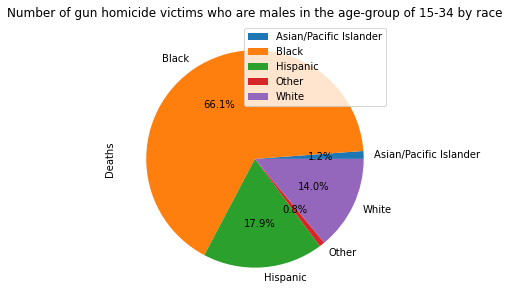

In [12]:
deaths_by_race.plot.pie(
    y='Deaths',
    title='Number of gun homicide victims who are males in the age-group of 15-34 by race',
    autopct='%1.1f%%', figsize=(5, 5)
)

Around two-thirds of homicide victims who are males in the age-group of 15-34 are black.

In [13]:
homicide_by_gender = homicide[['Gender', 'Deaths']].groupby('Gender').sum()
homicide_by_gender.drop('None selected', inplace=True)
homicide_by_gender['Death percent'] = (homicide_by_gender['Deaths'] / homicide_by_gender['Deaths'].sum()) * 100
homicide_by_gender

,Deaths,Death percent
Gender,,
Female,7167,15.279495
Male,39739,84.720505


<AxesSubplot:title={'center':'Percent of homicides by gender'}, xlabel='Gender'>

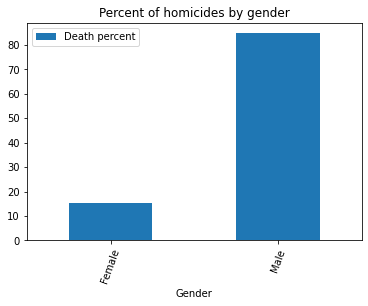

In [14]:
homicide_by_gender.plot.bar(
    y='Death percent', rot=70, title='Percent of homicides by gender'
)

Women constitue only 15 percent of the total homicide victims.